In [2]:
import numpy as np
import matplotlib.pyplot as plt
from TWA_Design_Tools import TWA_Design_Toolkit

In [3]:
# Enter the physical parameters of the antenna 
num_straps = 8
f0 = 96e6
w0 = 2*np.pi*f0
clight = 3e8
Rant = 1.12 # m, hfs of d3d

# See code logbook "my antenna" section. This is for shot 147634. 
n_par = -5 
k_par = w0*n_par/clight
print(f'k_par : {k_par} 1/m')
n_phi = Rant*k_par
print(f'n_phi: {n_phi}')

myTWA = TWA_Design_Toolkit(num_straps=num_straps, f0=f0, k_par_max=k_par)
myTWA.print_key_params()

# set my antenna width to 50% of the distance between straps 
myTWA.set_strap_width(w=8e-2)
print(f'Strap width: {myTWA.wstr*100} cm')




k_par : -10.053096491487338 1/m
n_phi: -11.25946807046582
You are at resonance, so delta_phi = pi/2. Solving for d given k_par:


----------------Parameter--Box-------------------
Distance between strap centers d = 0.15625 m
The first null will be at 5.026548245743669 m^-1
delta_phi = -0.5 pi
Strap length should be less than lambda/4 = 0.7807095260416667 m
--------------END--Parameter--Box----------------


The antenna length is 1.17375 m long
Strap width: 8.0 cm


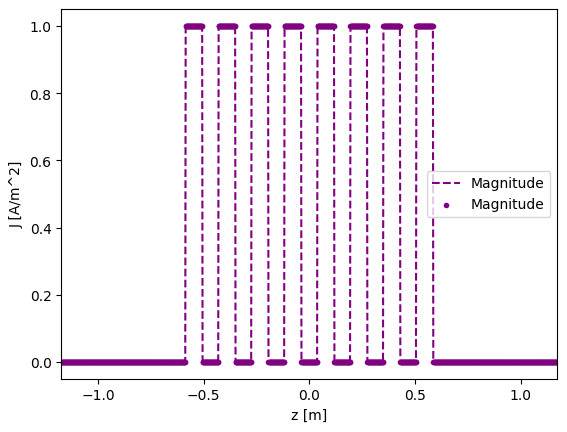

In [4]:
# Confirm that the spectrum is set up correctly 

zrange = 100
num_points = int(1e5) # number of grid points for the z grid
zlim = 2*(num_straps*myTWA.wstr + (num_straps-1)*(myTWA.d - myTWA.wstr))/2
plt.xlim(-zlim, zlim)
myTWA.plot_J_of_z(J0=1, zmin=-zrange, zmax=zrange, num_points=num_points)

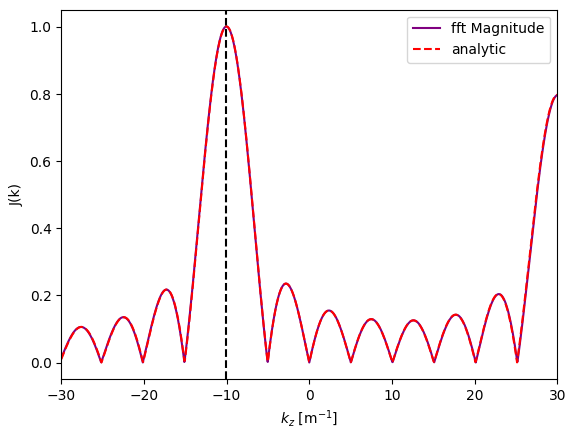

In [5]:
# now, plot the fourier spectrum of power over the k_par number 
myTWA.plot_J_k_versus_k(zmin=-zrange, zmax=zrange, kplotmin=-30, kplotmax=30, num_pointsz=num_points, num_pointsk=1000, J0=1)

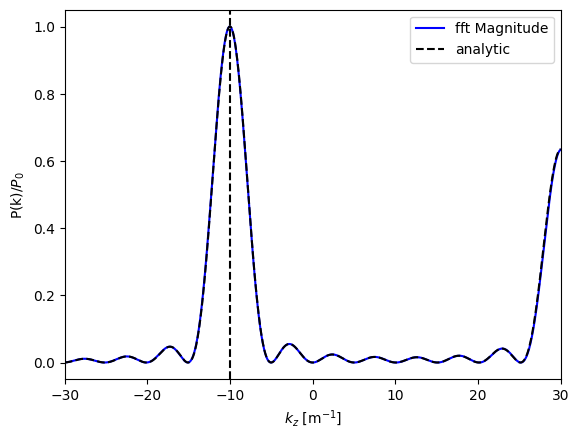

In [6]:
myTWA.plot_normalized_power_versus_k(zmin=-zrange, zmax=zrange, kplotmin=-30, kplotmax=30, num_pointsz=num_points, num_pointsk=1000, J0=1)

In [7]:
print(myTWA.delta_phi)
print(myTWA.w0)
print(myTWA.d)
print(myTWA.k_par_max)

-1.5707963267948966
603185789.4892403
0.15625
-10.053096491487338


In [22]:
## S and Z matrix Section 
import csv
data = []
with open('S_matrix.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)
data[5:]
complex_array = np.array([[complex(num.replace('i', 'j')) for num in row] for row in data[5:]], dtype=complex)[:, 2:]


In [35]:
print(complex_array.shape)

(8, 64)


In [39]:
size_Smatrix = int(np.sqrt(complex_array.shape[1]))
Smat = np.zeros((size_Smatrix, size_Smatrix), dtype=complex)
print(Smat.shape)
colnum = 0
for i in range(size_Smatrix):
    for j in range(size_Smatrix):
        Sij = complex_array[j, colnum]
        Smat[i,j] = Sij
        colnum += 1

print(Smat[-1,:])
        

(8, 8)
[ 1.68724474e-05-1.37161538e-04j -4.69858779e-05+2.67538675e-04j
 -1.55723434e-03+1.64894448e-03j -1.01338294e-02+2.05962426e-03j
 -3.48700182e-02-1.84329229e-02j -4.13189780e-02-1.31296205e-01j
  2.64506962e-01-3.82244125e-01j  7.50134561e-01+4.46217182e-01j]


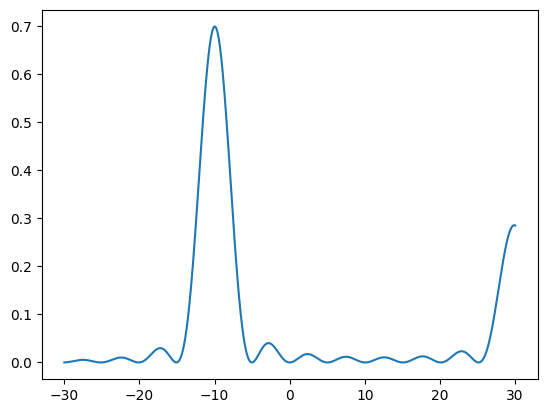

In [ ]:
W = 10.9375/100
w0 = f0*2*np.pi
c = 3e8
delta_phi = np.pi/2
d = 0.15625

def get_fft_analytic(k, P0):
    n = k*c/(w0) # TODO why is this negative? 
    if n == 0:
        return 1*P0
    else:
        term1 = np.sin(n*W*w0/(2*c))**2 / n**2
        alpha = delta_phi + n*w0*d/c
        # alpha = self.delta_phi + n*self.w0*self.d/self.clight
        term2 = np.sin(num_straps*alpha/2)**2/np.sin(alpha/2)**2
        return P0*term1 * term2
    
karray = np.linspace(-30, 30, 1000)
anyarray = np.zeros_like(karray)
for i in range(karray.shape[0]):
    anyarray[i] = get_fft_analytic(karray[i], 1)

plt.plot(karray, anyarray)